# Bank dataset

We have a transaction details of 515 banks which include number of DD taken, Withdrawals, Deposits, Area of the branch and Average Walk-Ins. Profile the banks into segments and come up with recommendations for each segment.

# Import libraries and load data

In [63]:
!pip install -U scikit-learn==0.23.1 --user
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt


Requirement already up-to-date: scikit-learn==0.23.1 in c:\users\admin\anaconda3\lib\site-packages (0.23.1)


In [64]:
data_df = pd.read_csv("leafdata.csv")

# Checking the data

In [65]:
data_df.head()

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
0,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560
1,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
2,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
3,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
4,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000023,0.34214


In [66]:
data_df.shape

(340, 14)

In [67]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Eccentricity               340 non-null    float64
 1   Aspect Ratio               340 non-null    float64
 2   Elongation                 340 non-null    float64
 3   Solidity                   340 non-null    float64
 4   Stochastic Convexity       340 non-null    float64
 5   Isoperimetric Factor       340 non-null    float64
 6   Maximal Indentation Depth  340 non-null    float64
 7   Lobedness                  340 non-null    float64
 8   Average Intensity          340 non-null    float64
 9    Average Contrast          340 non-null    float64
 10  Smoothness                 340 non-null    float64
 11   Third moment              340 non-null    float64
 12  Uniformity                 340 non-null    float64
 13  Entropy                    340 non-null    float64

# Checking Summary Statistic

In [68]:
data_df.describe()

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,0.719854,1.902051,0.513760,0.919101,0.975867,0.531234,0.034647,0.284499,0.051209,0.124535,0.017491,0.005678,0.000356,1.162630
std,0.208311,0.888783,0.195583,0.075247,0.032506,0.217532,0.031502,0.365318,0.035518,0.051860,0.013189,0.004495,0.000336,0.584854
min,0.117080,1.006600,0.107610,0.761323,0.915575,0.078376,0.002837,0.001464,0.005022,0.033415,0.001115,0.000229,0.000007,0.169400
25%,0.550622,1.211300,0.349623,0.890667,0.966230,0.346818,0.009521,0.016500,0.022843,0.083362,0.006901,0.002080,0.000102,0.718900
50%,0.763450,1.570750,0.501855,0.948130,0.992980,0.579160,0.023860,0.103615,0.042087,0.119375,0.014050,0.004447,0.000239,1.077450
75%,0.895097,2.343100,0.633373,0.976897,1.000000,0.700712,0.047834,0.416433,0.073046,0.163795,0.026127,0.008307,0.000516,1.554575
max,0.998710,4.040800,0.948340,0.993880,1.000000,0.858160,0.105303,1.016331,0.148349,0.280810,0.054967,0.017648,0.001137,2.708500


# Checking for Duplicates

In [69]:
data_df.duplicated().sum()

0

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [16]:
link_method = linkage(data_df.iloc[:,1:6], method = 'average')
link_method

array([[1.47000000e+02, 3.06000000e+02, 5.44840344e-03, 2.00000000e+00],
       [3.13000000e+02, 3.14000000e+02, 6.35429776e-03, 2.00000000e+00],
       [1.70000000e+01, 1.58000000e+02, 6.57827485e-03, 2.00000000e+00],
       ...,
       [6.60000000e+02, 6.72000000e+02, 7.02414474e-01, 1.95000000e+02],
       [6.75000000e+02, 6.76000000e+02, 1.07822756e+00, 3.06000000e+02],
       [6.68000000e+02, 6.77000000e+02, 2.44904380e+00, 3.40000000e+02]])

There are no Duplicates in the dataset

# Scaling the data

In [70]:
# importing the StandardScaler Module

from sklearn.preprocessing import StandardScaler

In [49]:
# Creating an object for the StandardScaler function
import numpy as np
np.random.seed(7)
array=np.array(np.random.rand(20)).reshape(10,2)
scaled_array = X.fit_transform(array)
X=StandardScaler()
k_means = KMeans(n_clusters = 2)
k_means.fit(scaled_array)
labels1 = k_means.labels_
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(scaled_array,labels1)

0.4069015400992441

In [74]:
scaled_df = X.fit_transform(data_df)


In [72]:
scaled_df

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
0,0.72694,1.4742,0.32396,0.985350,1.000000,0.835920,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560
1,0.74173,1.5257,0.36116,0.981520,0.998250,0.798670,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
2,0.76722,1.5725,0.38998,0.977550,1.000000,0.808120,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
3,0.73797,1.4597,0.35376,0.975660,1.000000,0.816970,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
4,0.82301,1.7707,0.44462,0.976980,1.000000,0.754930,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000023,0.34214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,0.37522,1.1417,0.81725,0.761323,0.915575,0.125230,0.091860,1.016331,0.114880,0.208610,0.041703,0.013344,0.000820,2.02810
336,0.28064,1.0849,0.75319,0.761323,0.915575,0.136860,0.078996,1.016331,0.141220,0.218300,0.045488,0.012002,0.001137,2.40590
337,0.35344,1.0329,0.78147,0.761323,0.915575,0.135030,0.089763,1.016331,0.097663,0.207030,0.041101,0.016123,0.000453,1.69350
338,0.59988,1.1427,0.71532,0.761323,0.915575,0.157470,0.105303,1.016331,0.050389,0.135850,0.018121,0.006190,0.000265,1.15260


# Creating Clusters using KMeans

### Forming 2 Clusters with K=2

In [56]:
# Create K Means cluster and store the result in the object k_means
k_means=KMeans(n_clusters=2)


In [57]:
# Fit K means on the scaled_df
k_means.fit(scaled_df)


KMeans(n_clusters=2)

### Cluster Output for all the observations

In [22]:
# Get the labels
k_means.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Within Cluster Sum of Squares

In [58]:
k_means.inertia_

326.2252969842884

### Forming clusters with K = 1,3,4,5,6 and comparing the WSS

In [53]:
k_means = KMeans(n_clusters = 1,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

631.7366221381612

In [55]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

195.11721762098608

In [54]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

118.28431222920834

In [28]:
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

85.53861277613129

WSS reduces as K keeps increasing

### Calculating WSS for other values of K - Elbow Method

In [29]:
wss =[] 

In [30]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [31]:
wss

[476.7248574322788,
 269.4637381854184,
 195.11721762098608,
 140.80203031919902,
 104.64740816776701,
 85.53861277613129,
 73.51487175107835,
 64.96600800014086,
 58.87938425299374,
 53.0116555133238]

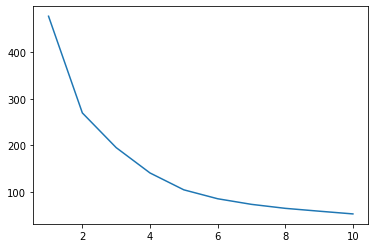

In [32]:
plt.plot(range(1,11), wss)

# KMeans with K=3

In [33]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_




195.11721762098608

### Cluster evaluation for 3 clusters: the silhouette score

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [41]:
# Calculating silhouette_score

k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_
labels

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

# KMeans with K=4

In [55]:
# k_means = KMeans(n_clusters = 4,random_state=1)
# k_means.fit(scaled_df)
# labels = k_means.labels_

### Cluster evaluation for 4 clusters

In [35]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [36]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(scaled_df,labels)

0.32400178787207495

silhouette score is better for 4 clusters than for 3 clusters. So, final clusters will be 4

Appending Clusters to the original dataset

In [37]:
data_df["Clus_kmeans4"] = labels
data_df.head()

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy,Clus_kmeans4
0,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560,0
1,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659,0
2,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348,1
3,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785,0
4,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000023,0.34214,1


# Cluster Profiling

In [38]:
data_df.Clus_kmeans4.value_counts().sort_index()

0    180
1    124
2     36
Name: Clus_kmeans4, dtype: int64

In [40]:
# clust_profile=data_df.drop(['Bank'],axis=1)
clust_profile=data_df.groupby('Clus_kmeans4').mean()
clust_profile['freq']=data_df.Clus_kmeans4.value_counts().sort_index()
clust_profile

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy,freq
Clus_kmeans4,,,,,,,,,,,,,,,
0,0.558868,1.266041,0.408260,0.902120,0.969025,0.555093,0.041804,0.373578,0.059112,0.135615,0.020266,0.006490,0.000431,1.288188,180
1,0.875296,2.219212,0.560880,0.949959,0.988852,0.588206,0.021010,0.126994,0.048167,0.120892,0.016440,0.005457,0.000320,1.131780,124
2,0.989371,3.989653,0.878957,0.897721,0.965357,0.215700,0.045826,0.381617,0.022177,0.081682,0.007238,0.002380,0.000105,0.641097,36


- Cluster 0: Medium size bank with less withdrawal,walkin, DD but highest Deposit
- Cluster 1: Medium size bank with less walkins and deposits and high withdrawals
- Cluster 2: Small size bank with less deposit but highest walkins and Withdrawals, and large DD
- Cluster 3: Large size bank with more number of walkins and highest DD, but less Deposits

# Some Recommendations

1. The banks in Cluster 3 has high DD and Withdrawals, but less Deposit.  So it needs to improve in making the customers Deposit more. Relatively large number of customers are visiting these banks. So, can promote various deposit schemes to these customers.


2. Customers in Cluster 3 seems to prefer payment through DD as these banks record the highest DD rate. Banks can check if DD is being made to other banks or to the same bank, and can look to create DD schemes for their own bank, so that customers will open their account with these banks and use the DD payment scheme.


3. Customers preferring DD payment can go to banks either in Cluster 3 (if they need large space which can manage large crowd probably with more infrastructure facilities), or Cluster 2 (if they want small space where probably quick transaction can happen due to less crowd holding capacity) 


4. Size of the bank doesn't matter in accomodating large group of customers inside the bank, as Cluster 2 though having the least Branch Area, has the highest daily walk ins. So, banks don't need to invest more in occupying large land space. This could mean Customers are visiting throughout the day rather than a large group of customers visiting during a period.


5. Cluster 0 has large area and the proportion of withdrawals and deposits is almost equal. Most of these customers could be having a savings account since the withdrawals as well as DD are less when compared to other clusters. Customers visiting these banks are also lesser than other clusters. These banks can look bringing in more customers and increase the bank deposit by introducing various deposit schemes.


6. Deposit is again less, while the withdrawals are much higher for Cluster 1. These banks can also look to introducing new deposit schemes.


7. Banks in cluster 1 and 2, needs to focus on their infrastructure and banking facilities, since the area is lesser than cluster 0 and 3 , whereas daily walkins is the highest. These banks can also look for opportunities to cross-sell products to the customers.


In [42]:
#data_df.to_csv('km.csv')